In [75]:
from pytube import YouTube
from PIL import Image
import requests
from io import BytesIO
import io
from hurry.filesize import size

In [4]:
def convert(seconds): 
    min, sec = divmod(seconds, 60) 
    hour, min = divmod(min, 60) 
    return "%d:%02d:%02d" % (hour, min, sec)

In [49]:
def getDetails(yt):
    print('**Título:** ', yt.title)
    print('**Autor:** ', yt.author)
    print('**Descrição do vídeo:**')
    print(yt.description)
    print('**Nº de Views:** {:,}'.format(yt.views).replace(',','.'))
    print('**Tempo de Vídeo:** ', convert(yt.length))
    print('**Classificação do Vídeo:** {:.2f}'.format(yt.rating))
    
    ys = yt.streams
    # print('**Tamanho aprox.:** ', size(ys.filesize_approx))
    versoes = {}
    for versao in ys.filter(file_extension='mp4', progressive=True):
        if versao.resolution is not None:
            versoes[versao.itag] = versao.resolution

    return ys, versoes

In [6]:
url = 'https://www.youtube.com/watch?v=Yw6u6YkTgQ4'
yt = YouTube(url)

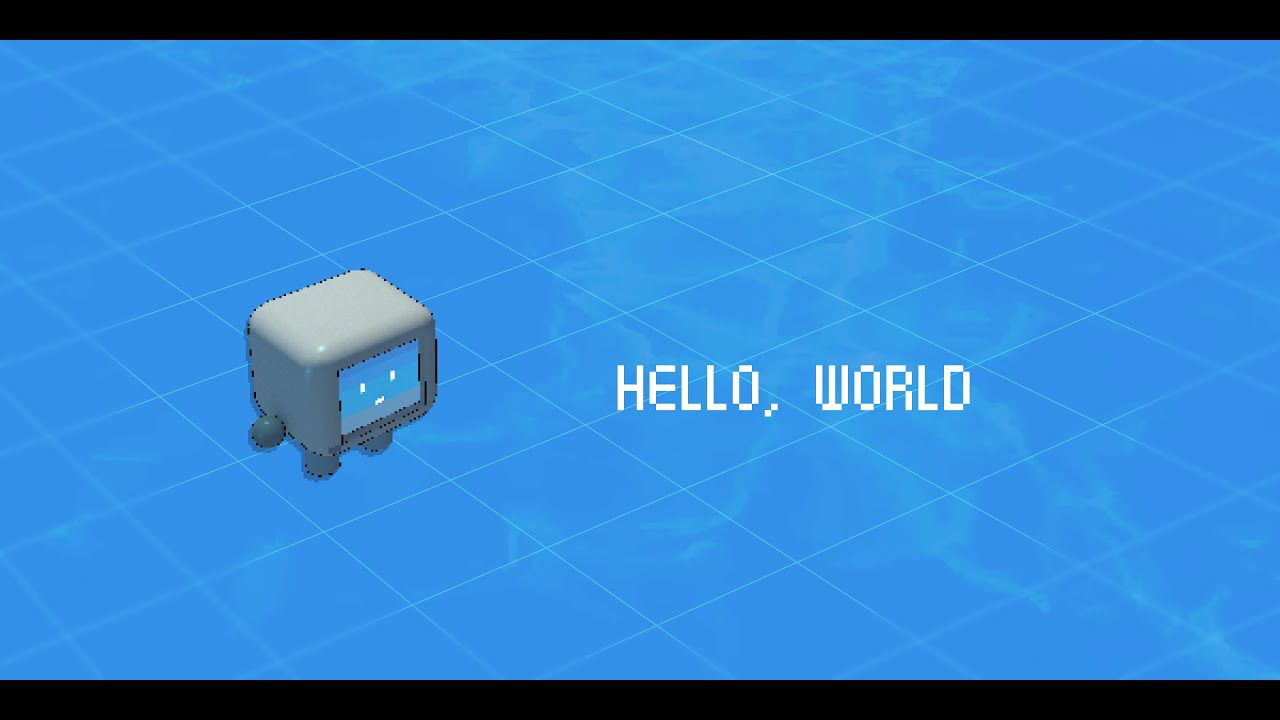

In [17]:
response = requests.get(yt.thumbnail_url)
thumb = Image.open(BytesIO(response.content))
thumb

In [50]:
details, opcoes = getDetails(yt)

**Título:**  hello world
**Autor:**  Louie Zong
**Descrição do vídeo:**
a test of a virtual singer software - http://www.myriad-online.com/en/products/virtualsinger.htm

also, soundcloud! https://soundcloud.com/louie-zong/hello-world
**Nº de Views:** 5.195.740
**Tempo de Vídeo:**  0:01:55
**Classificação do Vídeo:** 4.98


In [52]:
opcoes


{18: '360p', 22: '720p'}

In [51]:
def downloadVersoes(detail, versao):
    dwn = detail.get_by_itag(versao)
    dwn.download()


{18: '360p', 22: '720p'}

In [61]:
tmp = []
for chave, valor in opcoes.items():
    tmp.append(valor)
tmp

['360p', '720p']

In [73]:
newDict = [key for (key,value) in opcoes.items() if value in tmp[1]]
newDict[0]

22

In [80]:
io.__doc__

"The io module provides the Python interfaces to stream handling. The\nbuiltin open function is defined in this module.\n\nAt the top of the I/O hierarchy is the abstract base class IOBase. It\ndefines the basic interface to a stream. Note, however, that there is no\nseparation between reading and writing to streams; implementations are\nallowed to raise an OSError if they do not support a given operation.\n\nExtending IOBase is RawIOBase which deals simply with the reading and\nwriting of raw bytes to a stream. FileIO subclasses RawIOBase to provide\nan interface to OS files.\n\nBufferedIOBase deals with buffering on a raw byte stream (RawIOBase). Its\nsubclasses, BufferedWriter, BufferedReader, and BufferedRWPair buffer\nstreams that are readable, writable, and both respectively.\nBufferedRandom provides a buffered interface to random access\nstreams. BytesIO is a simple stream of in-memory bytes.\n\nAnother IOBase subclass, TextIOBase, deals with the encoding and decoding\nof stream